In [1]:
# Imports
from PIL import Image
import numpy as np
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt

from tensorflow import set_random_seed
import keras
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.layers import Dropout
from keras.optimizers import rmsprop, Adam
from keras import backend as K

from sklearn.model_selection import train_test_split

C:\Users\Daniel\anaconda3\envs\final\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Daniel\anaconda3\envs\final\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Daniel\anaconda3\envs\final\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Daniel\anaconda3\envs\final\lib\site-packages\tensorflow\pyth

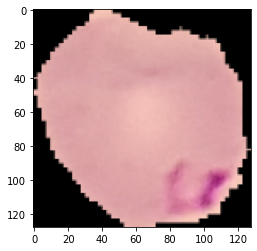

Image height = 128
Image width = 128
Image channels count = 3


In [2]:
# Display first image and image details
data = image.imread('data/training/features/00000.jpg')
pyplot.imshow(data)
pyplot.show()
(imgHeight, imgWidth, imgChannels) = data.shape
print("Image height = " + str(imgHeight))
print("Image width = " + str(imgWidth))

print("Image channels count = " + str(imgChannels))

In [3]:
# Functions needed to load images into a numpy array

# Get the shape of an image
def imageDetails(imagePath):
    im = image.imread(imagePath)
    return im.shape

# Convert a number to a string with a fixed length of 5 digits with optional zero padding
def imageNumToStr(num):
    return str(num).zfill(5)

def loadImagesAsNpArray(imagesFolderPath, startNum, endNum):
    (imgHeight, imgWidth, imgChannels) = imageDetails(imagesFolderPath+'/'+imageNumToStr(startNum)+'.jpg')
    features = np.zeros((endNum - startNum + 1, imgHeight, imgWidth, imgChannels))
    imageCounter = 0
    for num in range(startNum, endNum+1):
        sNum = imageNumToStr(num)
        curImagePath = imagesFolderPath + '/' + sNum + '.jpg'
        print("Loading image = " + curImagePath)
        features[imageCounter, :] = np.array(Image.open(curImagePath))
        imageCounter += 1
    return features

In [4]:
# Load all training images
trainStartNum = 0
trainEndNum = 19999


trainingImagesPath = 'data/training/features'
allTrainingFeatures = loadImagesAsNpArray(trainingImagesPath, trainStartNum, trainEndNum)
allTrainingFeatures = allTrainingFeatures.astype('float')/255

Loading image = data/training/features/00000.jpg
Loading image = data/training/features/00001.jpg
Loading image = data/training/features/00002.jpg
Loading image = data/training/features/00003.jpg
Loading image = data/training/features/00004.jpg
Loading image = data/training/features/00005.jpg
Loading image = data/training/features/00006.jpg
Loading image = data/training/features/00007.jpg
Loading image = data/training/features/00008.jpg
Loading image = data/training/features/00009.jpg
Loading image = data/training/features/00010.jpg
Loading image = data/training/features/00011.jpg
Loading image = data/training/features/00012.jpg
Loading image = data/training/features/00013.jpg
Loading image = data/training/features/00014.jpg
Loading image = data/training/features/00015.jpg
Loading image = data/training/features/00016.jpg
Loading image = data/training/features/00017.jpg
Loading image = data/training/features/00018.jpg
Loading image = data/training/features/00019.jpg
Loading image = data

Loading image = data/training/features/00222.jpg
Loading image = data/training/features/00223.jpg
Loading image = data/training/features/00224.jpg
Loading image = data/training/features/00225.jpg
Loading image = data/training/features/00226.jpg
Loading image = data/training/features/00227.jpg
Loading image = data/training/features/00228.jpg
Loading image = data/training/features/00229.jpg
Loading image = data/training/features/00230.jpg
Loading image = data/training/features/00231.jpg
Loading image = data/training/features/00232.jpg
Loading image = data/training/features/00233.jpg
Loading image = data/training/features/00234.jpg
Loading image = data/training/features/00235.jpg
Loading image = data/training/features/00236.jpg
Loading image = data/training/features/00237.jpg
Loading image = data/training/features/00238.jpg
Loading image = data/training/features/00239.jpg
Loading image = data/training/features/00240.jpg
Loading image = data/training/features/00241.jpg
Loading image = data

Loading image = data/training/features/00479.jpg
Loading image = data/training/features/00480.jpg
Loading image = data/training/features/00481.jpg
Loading image = data/training/features/00482.jpg
Loading image = data/training/features/00483.jpg
Loading image = data/training/features/00484.jpg
Loading image = data/training/features/00485.jpg
Loading image = data/training/features/00486.jpg
Loading image = data/training/features/00487.jpg
Loading image = data/training/features/00488.jpg
Loading image = data/training/features/00489.jpg
Loading image = data/training/features/00490.jpg
Loading image = data/training/features/00491.jpg
Loading image = data/training/features/00492.jpg
Loading image = data/training/features/00493.jpg
Loading image = data/training/features/00494.jpg
Loading image = data/training/features/00495.jpg
Loading image = data/training/features/00496.jpg
Loading image = data/training/features/00497.jpg
Loading image = data/training/features/00498.jpg
Loading image = data

Loading image = data/training/features/00736.jpg
Loading image = data/training/features/00737.jpg
Loading image = data/training/features/00738.jpg
Loading image = data/training/features/00739.jpg
Loading image = data/training/features/00740.jpg
Loading image = data/training/features/00741.jpg
Loading image = data/training/features/00742.jpg
Loading image = data/training/features/00743.jpg
Loading image = data/training/features/00744.jpg
Loading image = data/training/features/00745.jpg
Loading image = data/training/features/00746.jpg
Loading image = data/training/features/00747.jpg
Loading image = data/training/features/00748.jpg
Loading image = data/training/features/00749.jpg
Loading image = data/training/features/00750.jpg
Loading image = data/training/features/00751.jpg
Loading image = data/training/features/00752.jpg
Loading image = data/training/features/00753.jpg
Loading image = data/training/features/00754.jpg
Loading image = data/training/features/00755.jpg
Loading image = data

Loading image = data/training/features/00993.jpg
Loading image = data/training/features/00994.jpg
Loading image = data/training/features/00995.jpg
Loading image = data/training/features/00996.jpg
Loading image = data/training/features/00997.jpg
Loading image = data/training/features/00998.jpg
Loading image = data/training/features/00999.jpg
Loading image = data/training/features/01000.jpg
Loading image = data/training/features/01001.jpg
Loading image = data/training/features/01002.jpg
Loading image = data/training/features/01003.jpg
Loading image = data/training/features/01004.jpg
Loading image = data/training/features/01005.jpg
Loading image = data/training/features/01006.jpg
Loading image = data/training/features/01007.jpg
Loading image = data/training/features/01008.jpg
Loading image = data/training/features/01009.jpg
Loading image = data/training/features/01010.jpg
Loading image = data/training/features/01011.jpg
Loading image = data/training/features/01012.jpg
Loading image = data

Loading image = data/training/features/01246.jpg
Loading image = data/training/features/01247.jpg
Loading image = data/training/features/01248.jpg
Loading image = data/training/features/01249.jpg
Loading image = data/training/features/01250.jpg
Loading image = data/training/features/01251.jpg
Loading image = data/training/features/01252.jpg
Loading image = data/training/features/01253.jpg
Loading image = data/training/features/01254.jpg
Loading image = data/training/features/01255.jpg
Loading image = data/training/features/01256.jpg
Loading image = data/training/features/01257.jpg
Loading image = data/training/features/01258.jpg
Loading image = data/training/features/01259.jpg
Loading image = data/training/features/01260.jpg
Loading image = data/training/features/01261.jpg
Loading image = data/training/features/01262.jpg
Loading image = data/training/features/01263.jpg
Loading image = data/training/features/01264.jpg
Loading image = data/training/features/01265.jpg
Loading image = data

Loading image = data/training/features/01505.jpg
Loading image = data/training/features/01506.jpg
Loading image = data/training/features/01507.jpg
Loading image = data/training/features/01508.jpg
Loading image = data/training/features/01509.jpg
Loading image = data/training/features/01510.jpg
Loading image = data/training/features/01511.jpg
Loading image = data/training/features/01512.jpg
Loading image = data/training/features/01513.jpg
Loading image = data/training/features/01514.jpg
Loading image = data/training/features/01515.jpg
Loading image = data/training/features/01516.jpg
Loading image = data/training/features/01517.jpg
Loading image = data/training/features/01518.jpg
Loading image = data/training/features/01519.jpg
Loading image = data/training/features/01520.jpg
Loading image = data/training/features/01521.jpg
Loading image = data/training/features/01522.jpg
Loading image = data/training/features/01523.jpg
Loading image = data/training/features/01524.jpg
Loading image = data

Loading image = data/training/features/01763.jpg
Loading image = data/training/features/01764.jpg
Loading image = data/training/features/01765.jpg
Loading image = data/training/features/01766.jpg
Loading image = data/training/features/01767.jpg
Loading image = data/training/features/01768.jpg
Loading image = data/training/features/01769.jpg
Loading image = data/training/features/01770.jpg
Loading image = data/training/features/01771.jpg
Loading image = data/training/features/01772.jpg
Loading image = data/training/features/01773.jpg
Loading image = data/training/features/01774.jpg
Loading image = data/training/features/01775.jpg
Loading image = data/training/features/01776.jpg
Loading image = data/training/features/01777.jpg
Loading image = data/training/features/01778.jpg
Loading image = data/training/features/01779.jpg
Loading image = data/training/features/01780.jpg
Loading image = data/training/features/01781.jpg
Loading image = data/training/features/01782.jpg
Loading image = data

Loading image = data/training/features/02019.jpg
Loading image = data/training/features/02020.jpg
Loading image = data/training/features/02021.jpg
Loading image = data/training/features/02022.jpg
Loading image = data/training/features/02023.jpg
Loading image = data/training/features/02024.jpg
Loading image = data/training/features/02025.jpg
Loading image = data/training/features/02026.jpg
Loading image = data/training/features/02027.jpg
Loading image = data/training/features/02028.jpg
Loading image = data/training/features/02029.jpg
Loading image = data/training/features/02030.jpg
Loading image = data/training/features/02031.jpg
Loading image = data/training/features/02032.jpg
Loading image = data/training/features/02033.jpg
Loading image = data/training/features/02034.jpg
Loading image = data/training/features/02035.jpg
Loading image = data/training/features/02036.jpg
Loading image = data/training/features/02037.jpg
Loading image = data/training/features/02038.jpg
Loading image = data

Loading image = data/training/features/02275.jpg
Loading image = data/training/features/02276.jpg
Loading image = data/training/features/02277.jpg
Loading image = data/training/features/02278.jpg
Loading image = data/training/features/02279.jpg
Loading image = data/training/features/02280.jpg
Loading image = data/training/features/02281.jpg
Loading image = data/training/features/02282.jpg
Loading image = data/training/features/02283.jpg
Loading image = data/training/features/02284.jpg
Loading image = data/training/features/02285.jpg
Loading image = data/training/features/02286.jpg
Loading image = data/training/features/02287.jpg
Loading image = data/training/features/02288.jpg
Loading image = data/training/features/02289.jpg
Loading image = data/training/features/02290.jpg
Loading image = data/training/features/02291.jpg
Loading image = data/training/features/02292.jpg
Loading image = data/training/features/02293.jpg
Loading image = data/training/features/02294.jpg
Loading image = data

Loading image = data/training/features/02533.jpg
Loading image = data/training/features/02534.jpg
Loading image = data/training/features/02535.jpg
Loading image = data/training/features/02536.jpg
Loading image = data/training/features/02537.jpg
Loading image = data/training/features/02538.jpg
Loading image = data/training/features/02539.jpg
Loading image = data/training/features/02540.jpg
Loading image = data/training/features/02541.jpg
Loading image = data/training/features/02542.jpg
Loading image = data/training/features/02543.jpg
Loading image = data/training/features/02544.jpg
Loading image = data/training/features/02545.jpg
Loading image = data/training/features/02546.jpg
Loading image = data/training/features/02547.jpg
Loading image = data/training/features/02548.jpg
Loading image = data/training/features/02549.jpg
Loading image = data/training/features/02550.jpg
Loading image = data/training/features/02551.jpg
Loading image = data/training/features/02552.jpg
Loading image = data

Loading image = data/training/features/02791.jpg
Loading image = data/training/features/02792.jpg
Loading image = data/training/features/02793.jpg
Loading image = data/training/features/02794.jpg
Loading image = data/training/features/02795.jpg
Loading image = data/training/features/02796.jpg
Loading image = data/training/features/02797.jpg
Loading image = data/training/features/02798.jpg
Loading image = data/training/features/02799.jpg
Loading image = data/training/features/02800.jpg
Loading image = data/training/features/02801.jpg
Loading image = data/training/features/02802.jpg
Loading image = data/training/features/02803.jpg
Loading image = data/training/features/02804.jpg
Loading image = data/training/features/02805.jpg
Loading image = data/training/features/02806.jpg
Loading image = data/training/features/02807.jpg
Loading image = data/training/features/02808.jpg
Loading image = data/training/features/02809.jpg
Loading image = data/training/features/02810.jpg
Loading image = data

Loading image = data/training/features/03047.jpg
Loading image = data/training/features/03048.jpg
Loading image = data/training/features/03049.jpg
Loading image = data/training/features/03050.jpg
Loading image = data/training/features/03051.jpg
Loading image = data/training/features/03052.jpg
Loading image = data/training/features/03053.jpg
Loading image = data/training/features/03054.jpg
Loading image = data/training/features/03055.jpg
Loading image = data/training/features/03056.jpg
Loading image = data/training/features/03057.jpg
Loading image = data/training/features/03058.jpg
Loading image = data/training/features/03059.jpg
Loading image = data/training/features/03060.jpg
Loading image = data/training/features/03061.jpg
Loading image = data/training/features/03062.jpg
Loading image = data/training/features/03063.jpg
Loading image = data/training/features/03064.jpg
Loading image = data/training/features/03065.jpg
Loading image = data/training/features/03066.jpg
Loading image = data

Loading image = data/training/features/03304.jpg
Loading image = data/training/features/03305.jpg
Loading image = data/training/features/03306.jpg
Loading image = data/training/features/03307.jpg
Loading image = data/training/features/03308.jpg
Loading image = data/training/features/03309.jpg
Loading image = data/training/features/03310.jpg
Loading image = data/training/features/03311.jpg
Loading image = data/training/features/03312.jpg
Loading image = data/training/features/03313.jpg
Loading image = data/training/features/03314.jpg
Loading image = data/training/features/03315.jpg
Loading image = data/training/features/03316.jpg
Loading image = data/training/features/03317.jpg
Loading image = data/training/features/03318.jpg
Loading image = data/training/features/03319.jpg
Loading image = data/training/features/03320.jpg
Loading image = data/training/features/03321.jpg
Loading image = data/training/features/03322.jpg
Loading image = data/training/features/03323.jpg
Loading image = data

Loading image = data/training/features/03560.jpg
Loading image = data/training/features/03561.jpg
Loading image = data/training/features/03562.jpg
Loading image = data/training/features/03563.jpg
Loading image = data/training/features/03564.jpg
Loading image = data/training/features/03565.jpg
Loading image = data/training/features/03566.jpg
Loading image = data/training/features/03567.jpg
Loading image = data/training/features/03568.jpg
Loading image = data/training/features/03569.jpg
Loading image = data/training/features/03570.jpg
Loading image = data/training/features/03571.jpg
Loading image = data/training/features/03572.jpg
Loading image = data/training/features/03573.jpg
Loading image = data/training/features/03574.jpg
Loading image = data/training/features/03575.jpg
Loading image = data/training/features/03576.jpg
Loading image = data/training/features/03577.jpg
Loading image = data/training/features/03578.jpg
Loading image = data/training/features/03579.jpg
Loading image = data

Loading image = data/training/features/03818.jpg
Loading image = data/training/features/03819.jpg
Loading image = data/training/features/03820.jpg
Loading image = data/training/features/03821.jpg
Loading image = data/training/features/03822.jpg
Loading image = data/training/features/03823.jpg
Loading image = data/training/features/03824.jpg
Loading image = data/training/features/03825.jpg
Loading image = data/training/features/03826.jpg
Loading image = data/training/features/03827.jpg
Loading image = data/training/features/03828.jpg
Loading image = data/training/features/03829.jpg
Loading image = data/training/features/03830.jpg
Loading image = data/training/features/03831.jpg
Loading image = data/training/features/03832.jpg
Loading image = data/training/features/03833.jpg
Loading image = data/training/features/03834.jpg
Loading image = data/training/features/03835.jpg
Loading image = data/training/features/03836.jpg
Loading image = data/training/features/03837.jpg
Loading image = data

Loading image = data/training/features/04075.jpg
Loading image = data/training/features/04076.jpg
Loading image = data/training/features/04077.jpg
Loading image = data/training/features/04078.jpg
Loading image = data/training/features/04079.jpg
Loading image = data/training/features/04080.jpg
Loading image = data/training/features/04081.jpg
Loading image = data/training/features/04082.jpg
Loading image = data/training/features/04083.jpg
Loading image = data/training/features/04084.jpg
Loading image = data/training/features/04085.jpg
Loading image = data/training/features/04086.jpg
Loading image = data/training/features/04087.jpg
Loading image = data/training/features/04088.jpg
Loading image = data/training/features/04089.jpg
Loading image = data/training/features/04090.jpg
Loading image = data/training/features/04091.jpg
Loading image = data/training/features/04092.jpg
Loading image = data/training/features/04093.jpg
Loading image = data/training/features/04094.jpg
Loading image = data

Loading image = data/training/features/04331.jpg
Loading image = data/training/features/04332.jpg
Loading image = data/training/features/04333.jpg
Loading image = data/training/features/04334.jpg
Loading image = data/training/features/04335.jpg
Loading image = data/training/features/04336.jpg
Loading image = data/training/features/04337.jpg
Loading image = data/training/features/04338.jpg
Loading image = data/training/features/04339.jpg
Loading image = data/training/features/04340.jpg
Loading image = data/training/features/04341.jpg
Loading image = data/training/features/04342.jpg
Loading image = data/training/features/04343.jpg
Loading image = data/training/features/04344.jpg
Loading image = data/training/features/04345.jpg
Loading image = data/training/features/04346.jpg
Loading image = data/training/features/04347.jpg
Loading image = data/training/features/04348.jpg
Loading image = data/training/features/04349.jpg
Loading image = data/training/features/04350.jpg
Loading image = data

Loading image = data/training/features/04589.jpg
Loading image = data/training/features/04590.jpg
Loading image = data/training/features/04591.jpg
Loading image = data/training/features/04592.jpg
Loading image = data/training/features/04593.jpg
Loading image = data/training/features/04594.jpg
Loading image = data/training/features/04595.jpg
Loading image = data/training/features/04596.jpg
Loading image = data/training/features/04597.jpg
Loading image = data/training/features/04598.jpg
Loading image = data/training/features/04599.jpg
Loading image = data/training/features/04600.jpg
Loading image = data/training/features/04601.jpg
Loading image = data/training/features/04602.jpg
Loading image = data/training/features/04603.jpg
Loading image = data/training/features/04604.jpg
Loading image = data/training/features/04605.jpg
Loading image = data/training/features/04606.jpg
Loading image = data/training/features/04607.jpg
Loading image = data/training/features/04608.jpg
Loading image = data

Loading image = data/training/features/04846.jpg
Loading image = data/training/features/04847.jpg
Loading image = data/training/features/04848.jpg
Loading image = data/training/features/04849.jpg
Loading image = data/training/features/04850.jpg
Loading image = data/training/features/04851.jpg
Loading image = data/training/features/04852.jpg
Loading image = data/training/features/04853.jpg
Loading image = data/training/features/04854.jpg
Loading image = data/training/features/04855.jpg
Loading image = data/training/features/04856.jpg
Loading image = data/training/features/04857.jpg
Loading image = data/training/features/04858.jpg
Loading image = data/training/features/04859.jpg
Loading image = data/training/features/04860.jpg
Loading image = data/training/features/04861.jpg
Loading image = data/training/features/04862.jpg
Loading image = data/training/features/04863.jpg
Loading image = data/training/features/04864.jpg
Loading image = data/training/features/04865.jpg
Loading image = data

Loading image = data/training/features/05098.jpg
Loading image = data/training/features/05099.jpg
Loading image = data/training/features/05100.jpg
Loading image = data/training/features/05101.jpg
Loading image = data/training/features/05102.jpg
Loading image = data/training/features/05103.jpg
Loading image = data/training/features/05104.jpg
Loading image = data/training/features/05105.jpg
Loading image = data/training/features/05106.jpg
Loading image = data/training/features/05107.jpg
Loading image = data/training/features/05108.jpg
Loading image = data/training/features/05109.jpg
Loading image = data/training/features/05110.jpg
Loading image = data/training/features/05111.jpg
Loading image = data/training/features/05112.jpg
Loading image = data/training/features/05113.jpg
Loading image = data/training/features/05114.jpg
Loading image = data/training/features/05115.jpg
Loading image = data/training/features/05116.jpg
Loading image = data/training/features/05117.jpg
Loading image = data

Loading image = data/training/features/05356.jpg
Loading image = data/training/features/05357.jpg
Loading image = data/training/features/05358.jpg
Loading image = data/training/features/05359.jpg
Loading image = data/training/features/05360.jpg
Loading image = data/training/features/05361.jpg
Loading image = data/training/features/05362.jpg
Loading image = data/training/features/05363.jpg
Loading image = data/training/features/05364.jpg
Loading image = data/training/features/05365.jpg
Loading image = data/training/features/05366.jpg
Loading image = data/training/features/05367.jpg
Loading image = data/training/features/05368.jpg
Loading image = data/training/features/05369.jpg
Loading image = data/training/features/05370.jpg
Loading image = data/training/features/05371.jpg
Loading image = data/training/features/05372.jpg
Loading image = data/training/features/05373.jpg
Loading image = data/training/features/05374.jpg
Loading image = data/training/features/05375.jpg
Loading image = data

Loading image = data/training/features/05611.jpg
Loading image = data/training/features/05612.jpg
Loading image = data/training/features/05613.jpg
Loading image = data/training/features/05614.jpg
Loading image = data/training/features/05615.jpg
Loading image = data/training/features/05616.jpg
Loading image = data/training/features/05617.jpg
Loading image = data/training/features/05618.jpg
Loading image = data/training/features/05619.jpg
Loading image = data/training/features/05620.jpg
Loading image = data/training/features/05621.jpg
Loading image = data/training/features/05622.jpg
Loading image = data/training/features/05623.jpg
Loading image = data/training/features/05624.jpg
Loading image = data/training/features/05625.jpg
Loading image = data/training/features/05626.jpg
Loading image = data/training/features/05627.jpg
Loading image = data/training/features/05628.jpg
Loading image = data/training/features/05629.jpg
Loading image = data/training/features/05630.jpg
Loading image = data

Loading image = data/training/features/05867.jpg
Loading image = data/training/features/05868.jpg
Loading image = data/training/features/05869.jpg
Loading image = data/training/features/05870.jpg
Loading image = data/training/features/05871.jpg
Loading image = data/training/features/05872.jpg
Loading image = data/training/features/05873.jpg
Loading image = data/training/features/05874.jpg
Loading image = data/training/features/05875.jpg
Loading image = data/training/features/05876.jpg
Loading image = data/training/features/05877.jpg
Loading image = data/training/features/05878.jpg
Loading image = data/training/features/05879.jpg
Loading image = data/training/features/05880.jpg
Loading image = data/training/features/05881.jpg
Loading image = data/training/features/05882.jpg
Loading image = data/training/features/05883.jpg
Loading image = data/training/features/05884.jpg
Loading image = data/training/features/05885.jpg
Loading image = data/training/features/05886.jpg
Loading image = data

Loading image = data/training/features/06126.jpg
Loading image = data/training/features/06127.jpg
Loading image = data/training/features/06128.jpg
Loading image = data/training/features/06129.jpg
Loading image = data/training/features/06130.jpg
Loading image = data/training/features/06131.jpg
Loading image = data/training/features/06132.jpg
Loading image = data/training/features/06133.jpg
Loading image = data/training/features/06134.jpg
Loading image = data/training/features/06135.jpg
Loading image = data/training/features/06136.jpg
Loading image = data/training/features/06137.jpg
Loading image = data/training/features/06138.jpg
Loading image = data/training/features/06139.jpg
Loading image = data/training/features/06140.jpg
Loading image = data/training/features/06141.jpg
Loading image = data/training/features/06142.jpg
Loading image = data/training/features/06143.jpg
Loading image = data/training/features/06144.jpg
Loading image = data/training/features/06145.jpg
Loading image = data

Loading image = data/training/features/06380.jpg
Loading image = data/training/features/06381.jpg
Loading image = data/training/features/06382.jpg
Loading image = data/training/features/06383.jpg
Loading image = data/training/features/06384.jpg
Loading image = data/training/features/06385.jpg
Loading image = data/training/features/06386.jpg
Loading image = data/training/features/06387.jpg
Loading image = data/training/features/06388.jpg
Loading image = data/training/features/06389.jpg
Loading image = data/training/features/06390.jpg
Loading image = data/training/features/06391.jpg
Loading image = data/training/features/06392.jpg
Loading image = data/training/features/06393.jpg
Loading image = data/training/features/06394.jpg
Loading image = data/training/features/06395.jpg
Loading image = data/training/features/06396.jpg
Loading image = data/training/features/06397.jpg
Loading image = data/training/features/06398.jpg
Loading image = data/training/features/06399.jpg
Loading image = data

Loading image = data/training/features/06638.jpg
Loading image = data/training/features/06639.jpg
Loading image = data/training/features/06640.jpg
Loading image = data/training/features/06641.jpg
Loading image = data/training/features/06642.jpg
Loading image = data/training/features/06643.jpg
Loading image = data/training/features/06644.jpg
Loading image = data/training/features/06645.jpg
Loading image = data/training/features/06646.jpg
Loading image = data/training/features/06647.jpg
Loading image = data/training/features/06648.jpg
Loading image = data/training/features/06649.jpg
Loading image = data/training/features/06650.jpg
Loading image = data/training/features/06651.jpg
Loading image = data/training/features/06652.jpg
Loading image = data/training/features/06653.jpg
Loading image = data/training/features/06654.jpg
Loading image = data/training/features/06655.jpg
Loading image = data/training/features/06656.jpg
Loading image = data/training/features/06657.jpg
Loading image = data

Loading image = data/training/features/06893.jpg
Loading image = data/training/features/06894.jpg
Loading image = data/training/features/06895.jpg
Loading image = data/training/features/06896.jpg
Loading image = data/training/features/06897.jpg
Loading image = data/training/features/06898.jpg
Loading image = data/training/features/06899.jpg
Loading image = data/training/features/06900.jpg
Loading image = data/training/features/06901.jpg
Loading image = data/training/features/06902.jpg
Loading image = data/training/features/06903.jpg
Loading image = data/training/features/06904.jpg
Loading image = data/training/features/06905.jpg
Loading image = data/training/features/06906.jpg
Loading image = data/training/features/06907.jpg
Loading image = data/training/features/06908.jpg
Loading image = data/training/features/06909.jpg
Loading image = data/training/features/06910.jpg
Loading image = data/training/features/06911.jpg
Loading image = data/training/features/06912.jpg
Loading image = data

Loading image = data/training/features/07150.jpg
Loading image = data/training/features/07151.jpg
Loading image = data/training/features/07152.jpg
Loading image = data/training/features/07153.jpg
Loading image = data/training/features/07154.jpg
Loading image = data/training/features/07155.jpg
Loading image = data/training/features/07156.jpg
Loading image = data/training/features/07157.jpg
Loading image = data/training/features/07158.jpg
Loading image = data/training/features/07159.jpg
Loading image = data/training/features/07160.jpg
Loading image = data/training/features/07161.jpg
Loading image = data/training/features/07162.jpg
Loading image = data/training/features/07163.jpg
Loading image = data/training/features/07164.jpg
Loading image = data/training/features/07165.jpg
Loading image = data/training/features/07166.jpg
Loading image = data/training/features/07167.jpg
Loading image = data/training/features/07168.jpg
Loading image = data/training/features/07169.jpg
Loading image = data

Loading image = data/training/features/07405.jpg
Loading image = data/training/features/07406.jpg
Loading image = data/training/features/07407.jpg
Loading image = data/training/features/07408.jpg
Loading image = data/training/features/07409.jpg
Loading image = data/training/features/07410.jpg
Loading image = data/training/features/07411.jpg
Loading image = data/training/features/07412.jpg
Loading image = data/training/features/07413.jpg
Loading image = data/training/features/07414.jpg
Loading image = data/training/features/07415.jpg
Loading image = data/training/features/07416.jpg
Loading image = data/training/features/07417.jpg
Loading image = data/training/features/07418.jpg
Loading image = data/training/features/07419.jpg
Loading image = data/training/features/07420.jpg
Loading image = data/training/features/07421.jpg
Loading image = data/training/features/07422.jpg
Loading image = data/training/features/07423.jpg
Loading image = data/training/features/07424.jpg
Loading image = data

Loading image = data/training/features/07661.jpg
Loading image = data/training/features/07662.jpg
Loading image = data/training/features/07663.jpg
Loading image = data/training/features/07664.jpg
Loading image = data/training/features/07665.jpg
Loading image = data/training/features/07666.jpg
Loading image = data/training/features/07667.jpg
Loading image = data/training/features/07668.jpg
Loading image = data/training/features/07669.jpg
Loading image = data/training/features/07670.jpg
Loading image = data/training/features/07671.jpg
Loading image = data/training/features/07672.jpg
Loading image = data/training/features/07673.jpg
Loading image = data/training/features/07674.jpg
Loading image = data/training/features/07675.jpg
Loading image = data/training/features/07676.jpg
Loading image = data/training/features/07677.jpg
Loading image = data/training/features/07678.jpg
Loading image = data/training/features/07679.jpg
Loading image = data/training/features/07680.jpg
Loading image = data

Loading image = data/training/features/07916.jpg
Loading image = data/training/features/07917.jpg
Loading image = data/training/features/07918.jpg
Loading image = data/training/features/07919.jpg
Loading image = data/training/features/07920.jpg
Loading image = data/training/features/07921.jpg
Loading image = data/training/features/07922.jpg
Loading image = data/training/features/07923.jpg
Loading image = data/training/features/07924.jpg
Loading image = data/training/features/07925.jpg
Loading image = data/training/features/07926.jpg
Loading image = data/training/features/07927.jpg
Loading image = data/training/features/07928.jpg
Loading image = data/training/features/07929.jpg
Loading image = data/training/features/07930.jpg
Loading image = data/training/features/07931.jpg
Loading image = data/training/features/07932.jpg
Loading image = data/training/features/07933.jpg
Loading image = data/training/features/07934.jpg
Loading image = data/training/features/07935.jpg
Loading image = data

Loading image = data/training/features/08171.jpg
Loading image = data/training/features/08172.jpg
Loading image = data/training/features/08173.jpg
Loading image = data/training/features/08174.jpg
Loading image = data/training/features/08175.jpg
Loading image = data/training/features/08176.jpg
Loading image = data/training/features/08177.jpg
Loading image = data/training/features/08178.jpg
Loading image = data/training/features/08179.jpg
Loading image = data/training/features/08180.jpg
Loading image = data/training/features/08181.jpg
Loading image = data/training/features/08182.jpg
Loading image = data/training/features/08183.jpg
Loading image = data/training/features/08184.jpg
Loading image = data/training/features/08185.jpg
Loading image = data/training/features/08186.jpg
Loading image = data/training/features/08187.jpg
Loading image = data/training/features/08188.jpg
Loading image = data/training/features/08189.jpg
Loading image = data/training/features/08190.jpg
Loading image = data

Loading image = data/training/features/08429.jpg
Loading image = data/training/features/08430.jpg
Loading image = data/training/features/08431.jpg
Loading image = data/training/features/08432.jpg
Loading image = data/training/features/08433.jpg
Loading image = data/training/features/08434.jpg
Loading image = data/training/features/08435.jpg
Loading image = data/training/features/08436.jpg
Loading image = data/training/features/08437.jpg
Loading image = data/training/features/08438.jpg
Loading image = data/training/features/08439.jpg
Loading image = data/training/features/08440.jpg
Loading image = data/training/features/08441.jpg
Loading image = data/training/features/08442.jpg
Loading image = data/training/features/08443.jpg
Loading image = data/training/features/08444.jpg
Loading image = data/training/features/08445.jpg
Loading image = data/training/features/08446.jpg
Loading image = data/training/features/08447.jpg
Loading image = data/training/features/08448.jpg
Loading image = data

Loading image = data/training/features/08685.jpg
Loading image = data/training/features/08686.jpg
Loading image = data/training/features/08687.jpg
Loading image = data/training/features/08688.jpg
Loading image = data/training/features/08689.jpg
Loading image = data/training/features/08690.jpg
Loading image = data/training/features/08691.jpg
Loading image = data/training/features/08692.jpg
Loading image = data/training/features/08693.jpg
Loading image = data/training/features/08694.jpg
Loading image = data/training/features/08695.jpg
Loading image = data/training/features/08696.jpg
Loading image = data/training/features/08697.jpg
Loading image = data/training/features/08698.jpg
Loading image = data/training/features/08699.jpg
Loading image = data/training/features/08700.jpg
Loading image = data/training/features/08701.jpg
Loading image = data/training/features/08702.jpg
Loading image = data/training/features/08703.jpg
Loading image = data/training/features/08704.jpg
Loading image = data

Loading image = data/training/features/08942.jpg
Loading image = data/training/features/08943.jpg
Loading image = data/training/features/08944.jpg
Loading image = data/training/features/08945.jpg
Loading image = data/training/features/08946.jpg
Loading image = data/training/features/08947.jpg
Loading image = data/training/features/08948.jpg
Loading image = data/training/features/08949.jpg
Loading image = data/training/features/08950.jpg
Loading image = data/training/features/08951.jpg
Loading image = data/training/features/08952.jpg
Loading image = data/training/features/08953.jpg
Loading image = data/training/features/08954.jpg
Loading image = data/training/features/08955.jpg
Loading image = data/training/features/08956.jpg
Loading image = data/training/features/08957.jpg
Loading image = data/training/features/08958.jpg
Loading image = data/training/features/08959.jpg
Loading image = data/training/features/08960.jpg
Loading image = data/training/features/08961.jpg
Loading image = data

Loading image = data/training/features/09200.jpg
Loading image = data/training/features/09201.jpg
Loading image = data/training/features/09202.jpg
Loading image = data/training/features/09203.jpg
Loading image = data/training/features/09204.jpg
Loading image = data/training/features/09205.jpg
Loading image = data/training/features/09206.jpg
Loading image = data/training/features/09207.jpg
Loading image = data/training/features/09208.jpg
Loading image = data/training/features/09209.jpg
Loading image = data/training/features/09210.jpg
Loading image = data/training/features/09211.jpg
Loading image = data/training/features/09212.jpg
Loading image = data/training/features/09213.jpg
Loading image = data/training/features/09214.jpg
Loading image = data/training/features/09215.jpg
Loading image = data/training/features/09216.jpg
Loading image = data/training/features/09217.jpg
Loading image = data/training/features/09218.jpg
Loading image = data/training/features/09219.jpg
Loading image = data

Loading image = data/training/features/09458.jpg
Loading image = data/training/features/09459.jpg
Loading image = data/training/features/09460.jpg
Loading image = data/training/features/09461.jpg
Loading image = data/training/features/09462.jpg
Loading image = data/training/features/09463.jpg
Loading image = data/training/features/09464.jpg
Loading image = data/training/features/09465.jpg
Loading image = data/training/features/09466.jpg
Loading image = data/training/features/09467.jpg
Loading image = data/training/features/09468.jpg
Loading image = data/training/features/09469.jpg
Loading image = data/training/features/09470.jpg
Loading image = data/training/features/09471.jpg
Loading image = data/training/features/09472.jpg
Loading image = data/training/features/09473.jpg
Loading image = data/training/features/09474.jpg
Loading image = data/training/features/09475.jpg
Loading image = data/training/features/09476.jpg
Loading image = data/training/features/09477.jpg
Loading image = data

Loading image = data/training/features/09714.jpg
Loading image = data/training/features/09715.jpg
Loading image = data/training/features/09716.jpg
Loading image = data/training/features/09717.jpg
Loading image = data/training/features/09718.jpg
Loading image = data/training/features/09719.jpg
Loading image = data/training/features/09720.jpg
Loading image = data/training/features/09721.jpg
Loading image = data/training/features/09722.jpg
Loading image = data/training/features/09723.jpg
Loading image = data/training/features/09724.jpg
Loading image = data/training/features/09725.jpg
Loading image = data/training/features/09726.jpg
Loading image = data/training/features/09727.jpg
Loading image = data/training/features/09728.jpg
Loading image = data/training/features/09729.jpg
Loading image = data/training/features/09730.jpg
Loading image = data/training/features/09731.jpg
Loading image = data/training/features/09732.jpg
Loading image = data/training/features/09733.jpg
Loading image = data

Loading image = data/training/features/09972.jpg
Loading image = data/training/features/09973.jpg
Loading image = data/training/features/09974.jpg
Loading image = data/training/features/09975.jpg
Loading image = data/training/features/09976.jpg
Loading image = data/training/features/09977.jpg
Loading image = data/training/features/09978.jpg
Loading image = data/training/features/09979.jpg
Loading image = data/training/features/09980.jpg
Loading image = data/training/features/09981.jpg
Loading image = data/training/features/09982.jpg
Loading image = data/training/features/09983.jpg
Loading image = data/training/features/09984.jpg
Loading image = data/training/features/09985.jpg
Loading image = data/training/features/09986.jpg
Loading image = data/training/features/09987.jpg
Loading image = data/training/features/09988.jpg
Loading image = data/training/features/09989.jpg
Loading image = data/training/features/09990.jpg
Loading image = data/training/features/09991.jpg
Loading image = data

Loading image = data/training/features/10230.jpg
Loading image = data/training/features/10231.jpg
Loading image = data/training/features/10232.jpg
Loading image = data/training/features/10233.jpg
Loading image = data/training/features/10234.jpg
Loading image = data/training/features/10235.jpg
Loading image = data/training/features/10236.jpg
Loading image = data/training/features/10237.jpg
Loading image = data/training/features/10238.jpg
Loading image = data/training/features/10239.jpg
Loading image = data/training/features/10240.jpg
Loading image = data/training/features/10241.jpg
Loading image = data/training/features/10242.jpg
Loading image = data/training/features/10243.jpg
Loading image = data/training/features/10244.jpg
Loading image = data/training/features/10245.jpg
Loading image = data/training/features/10246.jpg
Loading image = data/training/features/10247.jpg
Loading image = data/training/features/10248.jpg
Loading image = data/training/features/10249.jpg
Loading image = data

Loading image = data/training/features/10485.jpg
Loading image = data/training/features/10486.jpg
Loading image = data/training/features/10487.jpg
Loading image = data/training/features/10488.jpg
Loading image = data/training/features/10489.jpg
Loading image = data/training/features/10490.jpg
Loading image = data/training/features/10491.jpg
Loading image = data/training/features/10492.jpg
Loading image = data/training/features/10493.jpg
Loading image = data/training/features/10494.jpg
Loading image = data/training/features/10495.jpg
Loading image = data/training/features/10496.jpg
Loading image = data/training/features/10497.jpg
Loading image = data/training/features/10498.jpg
Loading image = data/training/features/10499.jpg
Loading image = data/training/features/10500.jpg
Loading image = data/training/features/10501.jpg
Loading image = data/training/features/10502.jpg
Loading image = data/training/features/10503.jpg
Loading image = data/training/features/10504.jpg
Loading image = data

Loading image = data/training/features/10742.jpg
Loading image = data/training/features/10743.jpg
Loading image = data/training/features/10744.jpg
Loading image = data/training/features/10745.jpg
Loading image = data/training/features/10746.jpg
Loading image = data/training/features/10747.jpg
Loading image = data/training/features/10748.jpg
Loading image = data/training/features/10749.jpg
Loading image = data/training/features/10750.jpg
Loading image = data/training/features/10751.jpg
Loading image = data/training/features/10752.jpg
Loading image = data/training/features/10753.jpg
Loading image = data/training/features/10754.jpg
Loading image = data/training/features/10755.jpg
Loading image = data/training/features/10756.jpg
Loading image = data/training/features/10757.jpg
Loading image = data/training/features/10758.jpg
Loading image = data/training/features/10759.jpg
Loading image = data/training/features/10760.jpg
Loading image = data/training/features/10761.jpg
Loading image = data

Loading image = data/training/features/10998.jpg
Loading image = data/training/features/10999.jpg
Loading image = data/training/features/11000.jpg
Loading image = data/training/features/11001.jpg
Loading image = data/training/features/11002.jpg
Loading image = data/training/features/11003.jpg
Loading image = data/training/features/11004.jpg
Loading image = data/training/features/11005.jpg
Loading image = data/training/features/11006.jpg
Loading image = data/training/features/11007.jpg
Loading image = data/training/features/11008.jpg
Loading image = data/training/features/11009.jpg
Loading image = data/training/features/11010.jpg
Loading image = data/training/features/11011.jpg
Loading image = data/training/features/11012.jpg
Loading image = data/training/features/11013.jpg
Loading image = data/training/features/11014.jpg
Loading image = data/training/features/11015.jpg
Loading image = data/training/features/11016.jpg
Loading image = data/training/features/11017.jpg
Loading image = data

Loading image = data/training/features/11256.jpg
Loading image = data/training/features/11257.jpg
Loading image = data/training/features/11258.jpg
Loading image = data/training/features/11259.jpg
Loading image = data/training/features/11260.jpg
Loading image = data/training/features/11261.jpg
Loading image = data/training/features/11262.jpg
Loading image = data/training/features/11263.jpg
Loading image = data/training/features/11264.jpg
Loading image = data/training/features/11265.jpg
Loading image = data/training/features/11266.jpg
Loading image = data/training/features/11267.jpg
Loading image = data/training/features/11268.jpg
Loading image = data/training/features/11269.jpg
Loading image = data/training/features/11270.jpg
Loading image = data/training/features/11271.jpg
Loading image = data/training/features/11272.jpg
Loading image = data/training/features/11273.jpg
Loading image = data/training/features/11274.jpg
Loading image = data/training/features/11275.jpg
Loading image = data

Loading image = data/training/features/11515.jpg
Loading image = data/training/features/11516.jpg
Loading image = data/training/features/11517.jpg
Loading image = data/training/features/11518.jpg
Loading image = data/training/features/11519.jpg
Loading image = data/training/features/11520.jpg
Loading image = data/training/features/11521.jpg
Loading image = data/training/features/11522.jpg
Loading image = data/training/features/11523.jpg
Loading image = data/training/features/11524.jpg
Loading image = data/training/features/11525.jpg
Loading image = data/training/features/11526.jpg
Loading image = data/training/features/11527.jpg
Loading image = data/training/features/11528.jpg
Loading image = data/training/features/11529.jpg
Loading image = data/training/features/11530.jpg
Loading image = data/training/features/11531.jpg
Loading image = data/training/features/11532.jpg
Loading image = data/training/features/11533.jpg
Loading image = data/training/features/11534.jpg
Loading image = data

Loading image = data/training/features/11773.jpg
Loading image = data/training/features/11774.jpg
Loading image = data/training/features/11775.jpg
Loading image = data/training/features/11776.jpg
Loading image = data/training/features/11777.jpg
Loading image = data/training/features/11778.jpg
Loading image = data/training/features/11779.jpg
Loading image = data/training/features/11780.jpg
Loading image = data/training/features/11781.jpg
Loading image = data/training/features/11782.jpg
Loading image = data/training/features/11783.jpg
Loading image = data/training/features/11784.jpg
Loading image = data/training/features/11785.jpg
Loading image = data/training/features/11786.jpg
Loading image = data/training/features/11787.jpg
Loading image = data/training/features/11788.jpg
Loading image = data/training/features/11789.jpg
Loading image = data/training/features/11790.jpg
Loading image = data/training/features/11791.jpg
Loading image = data/training/features/11792.jpg
Loading image = data

Loading image = data/training/features/12027.jpg
Loading image = data/training/features/12028.jpg
Loading image = data/training/features/12029.jpg
Loading image = data/training/features/12030.jpg
Loading image = data/training/features/12031.jpg
Loading image = data/training/features/12032.jpg
Loading image = data/training/features/12033.jpg
Loading image = data/training/features/12034.jpg
Loading image = data/training/features/12035.jpg
Loading image = data/training/features/12036.jpg
Loading image = data/training/features/12037.jpg
Loading image = data/training/features/12038.jpg
Loading image = data/training/features/12039.jpg
Loading image = data/training/features/12040.jpg
Loading image = data/training/features/12041.jpg
Loading image = data/training/features/12042.jpg
Loading image = data/training/features/12043.jpg
Loading image = data/training/features/12044.jpg
Loading image = data/training/features/12045.jpg
Loading image = data/training/features/12046.jpg
Loading image = data

Loading image = data/training/features/12285.jpg
Loading image = data/training/features/12286.jpg
Loading image = data/training/features/12287.jpg
Loading image = data/training/features/12288.jpg
Loading image = data/training/features/12289.jpg
Loading image = data/training/features/12290.jpg
Loading image = data/training/features/12291.jpg
Loading image = data/training/features/12292.jpg
Loading image = data/training/features/12293.jpg
Loading image = data/training/features/12294.jpg
Loading image = data/training/features/12295.jpg
Loading image = data/training/features/12296.jpg
Loading image = data/training/features/12297.jpg
Loading image = data/training/features/12298.jpg
Loading image = data/training/features/12299.jpg
Loading image = data/training/features/12300.jpg
Loading image = data/training/features/12301.jpg
Loading image = data/training/features/12302.jpg
Loading image = data/training/features/12303.jpg
Loading image = data/training/features/12304.jpg
Loading image = data

Loading image = data/training/features/12537.jpg
Loading image = data/training/features/12538.jpg
Loading image = data/training/features/12539.jpg
Loading image = data/training/features/12540.jpg
Loading image = data/training/features/12541.jpg
Loading image = data/training/features/12542.jpg
Loading image = data/training/features/12543.jpg
Loading image = data/training/features/12544.jpg
Loading image = data/training/features/12545.jpg
Loading image = data/training/features/12546.jpg
Loading image = data/training/features/12547.jpg
Loading image = data/training/features/12548.jpg
Loading image = data/training/features/12549.jpg
Loading image = data/training/features/12550.jpg
Loading image = data/training/features/12551.jpg
Loading image = data/training/features/12552.jpg
Loading image = data/training/features/12553.jpg
Loading image = data/training/features/12554.jpg
Loading image = data/training/features/12555.jpg
Loading image = data/training/features/12556.jpg
Loading image = data

Loading image = data/training/features/12796.jpg
Loading image = data/training/features/12797.jpg
Loading image = data/training/features/12798.jpg
Loading image = data/training/features/12799.jpg
Loading image = data/training/features/12800.jpg
Loading image = data/training/features/12801.jpg
Loading image = data/training/features/12802.jpg
Loading image = data/training/features/12803.jpg
Loading image = data/training/features/12804.jpg
Loading image = data/training/features/12805.jpg
Loading image = data/training/features/12806.jpg
Loading image = data/training/features/12807.jpg
Loading image = data/training/features/12808.jpg
Loading image = data/training/features/12809.jpg
Loading image = data/training/features/12810.jpg
Loading image = data/training/features/12811.jpg
Loading image = data/training/features/12812.jpg
Loading image = data/training/features/12813.jpg
Loading image = data/training/features/12814.jpg
Loading image = data/training/features/12815.jpg
Loading image = data

Loading image = data/training/features/13055.jpg
Loading image = data/training/features/13056.jpg
Loading image = data/training/features/13057.jpg
Loading image = data/training/features/13058.jpg
Loading image = data/training/features/13059.jpg
Loading image = data/training/features/13060.jpg
Loading image = data/training/features/13061.jpg
Loading image = data/training/features/13062.jpg
Loading image = data/training/features/13063.jpg
Loading image = data/training/features/13064.jpg
Loading image = data/training/features/13065.jpg
Loading image = data/training/features/13066.jpg
Loading image = data/training/features/13067.jpg
Loading image = data/training/features/13068.jpg
Loading image = data/training/features/13069.jpg
Loading image = data/training/features/13070.jpg
Loading image = data/training/features/13071.jpg
Loading image = data/training/features/13072.jpg
Loading image = data/training/features/13073.jpg
Loading image = data/training/features/13074.jpg
Loading image = data

Loading image = data/training/features/13314.jpg
Loading image = data/training/features/13315.jpg
Loading image = data/training/features/13316.jpg
Loading image = data/training/features/13317.jpg
Loading image = data/training/features/13318.jpg
Loading image = data/training/features/13319.jpg
Loading image = data/training/features/13320.jpg
Loading image = data/training/features/13321.jpg
Loading image = data/training/features/13322.jpg
Loading image = data/training/features/13323.jpg
Loading image = data/training/features/13324.jpg
Loading image = data/training/features/13325.jpg
Loading image = data/training/features/13326.jpg
Loading image = data/training/features/13327.jpg
Loading image = data/training/features/13328.jpg
Loading image = data/training/features/13329.jpg
Loading image = data/training/features/13330.jpg
Loading image = data/training/features/13331.jpg
Loading image = data/training/features/13332.jpg
Loading image = data/training/features/13333.jpg
Loading image = data

Loading image = data/training/features/13573.jpg
Loading image = data/training/features/13574.jpg
Loading image = data/training/features/13575.jpg
Loading image = data/training/features/13576.jpg
Loading image = data/training/features/13577.jpg
Loading image = data/training/features/13578.jpg
Loading image = data/training/features/13579.jpg
Loading image = data/training/features/13580.jpg
Loading image = data/training/features/13581.jpg
Loading image = data/training/features/13582.jpg
Loading image = data/training/features/13583.jpg
Loading image = data/training/features/13584.jpg
Loading image = data/training/features/13585.jpg
Loading image = data/training/features/13586.jpg
Loading image = data/training/features/13587.jpg
Loading image = data/training/features/13588.jpg
Loading image = data/training/features/13589.jpg
Loading image = data/training/features/13590.jpg
Loading image = data/training/features/13591.jpg
Loading image = data/training/features/13592.jpg
Loading image = data

Loading image = data/training/features/13831.jpg
Loading image = data/training/features/13832.jpg
Loading image = data/training/features/13833.jpg
Loading image = data/training/features/13834.jpg
Loading image = data/training/features/13835.jpg
Loading image = data/training/features/13836.jpg
Loading image = data/training/features/13837.jpg
Loading image = data/training/features/13838.jpg
Loading image = data/training/features/13839.jpg
Loading image = data/training/features/13840.jpg
Loading image = data/training/features/13841.jpg
Loading image = data/training/features/13842.jpg
Loading image = data/training/features/13843.jpg
Loading image = data/training/features/13844.jpg
Loading image = data/training/features/13845.jpg
Loading image = data/training/features/13846.jpg
Loading image = data/training/features/13847.jpg
Loading image = data/training/features/13848.jpg
Loading image = data/training/features/13849.jpg
Loading image = data/training/features/13850.jpg
Loading image = data

Loading image = data/training/features/14089.jpg
Loading image = data/training/features/14090.jpg
Loading image = data/training/features/14091.jpg
Loading image = data/training/features/14092.jpg
Loading image = data/training/features/14093.jpg
Loading image = data/training/features/14094.jpg
Loading image = data/training/features/14095.jpg
Loading image = data/training/features/14096.jpg
Loading image = data/training/features/14097.jpg
Loading image = data/training/features/14098.jpg
Loading image = data/training/features/14099.jpg
Loading image = data/training/features/14100.jpg
Loading image = data/training/features/14101.jpg
Loading image = data/training/features/14102.jpg
Loading image = data/training/features/14103.jpg
Loading image = data/training/features/14104.jpg
Loading image = data/training/features/14105.jpg
Loading image = data/training/features/14106.jpg
Loading image = data/training/features/14107.jpg
Loading image = data/training/features/14108.jpg
Loading image = data

Loading image = data/training/features/14344.jpg
Loading image = data/training/features/14345.jpg
Loading image = data/training/features/14346.jpg
Loading image = data/training/features/14347.jpg
Loading image = data/training/features/14348.jpg
Loading image = data/training/features/14349.jpg
Loading image = data/training/features/14350.jpg
Loading image = data/training/features/14351.jpg
Loading image = data/training/features/14352.jpg
Loading image = data/training/features/14353.jpg
Loading image = data/training/features/14354.jpg
Loading image = data/training/features/14355.jpg
Loading image = data/training/features/14356.jpg
Loading image = data/training/features/14357.jpg
Loading image = data/training/features/14358.jpg
Loading image = data/training/features/14359.jpg
Loading image = data/training/features/14360.jpg
Loading image = data/training/features/14361.jpg
Loading image = data/training/features/14362.jpg
Loading image = data/training/features/14363.jpg
Loading image = data

Loading image = data/training/features/14601.jpg
Loading image = data/training/features/14602.jpg
Loading image = data/training/features/14603.jpg
Loading image = data/training/features/14604.jpg
Loading image = data/training/features/14605.jpg
Loading image = data/training/features/14606.jpg
Loading image = data/training/features/14607.jpg
Loading image = data/training/features/14608.jpg
Loading image = data/training/features/14609.jpg
Loading image = data/training/features/14610.jpg
Loading image = data/training/features/14611.jpg
Loading image = data/training/features/14612.jpg
Loading image = data/training/features/14613.jpg
Loading image = data/training/features/14614.jpg
Loading image = data/training/features/14615.jpg
Loading image = data/training/features/14616.jpg
Loading image = data/training/features/14617.jpg
Loading image = data/training/features/14618.jpg
Loading image = data/training/features/14619.jpg
Loading image = data/training/features/14620.jpg
Loading image = data

Loading image = data/training/features/14858.jpg
Loading image = data/training/features/14859.jpg
Loading image = data/training/features/14860.jpg
Loading image = data/training/features/14861.jpg
Loading image = data/training/features/14862.jpg
Loading image = data/training/features/14863.jpg
Loading image = data/training/features/14864.jpg
Loading image = data/training/features/14865.jpg
Loading image = data/training/features/14866.jpg
Loading image = data/training/features/14867.jpg
Loading image = data/training/features/14868.jpg
Loading image = data/training/features/14869.jpg
Loading image = data/training/features/14870.jpg
Loading image = data/training/features/14871.jpg
Loading image = data/training/features/14872.jpg
Loading image = data/training/features/14873.jpg
Loading image = data/training/features/14874.jpg
Loading image = data/training/features/14875.jpg
Loading image = data/training/features/14876.jpg
Loading image = data/training/features/14877.jpg
Loading image = data

Loading image = data/training/features/15116.jpg
Loading image = data/training/features/15117.jpg
Loading image = data/training/features/15118.jpg
Loading image = data/training/features/15119.jpg
Loading image = data/training/features/15120.jpg
Loading image = data/training/features/15121.jpg
Loading image = data/training/features/15122.jpg
Loading image = data/training/features/15123.jpg
Loading image = data/training/features/15124.jpg
Loading image = data/training/features/15125.jpg
Loading image = data/training/features/15126.jpg
Loading image = data/training/features/15127.jpg
Loading image = data/training/features/15128.jpg
Loading image = data/training/features/15129.jpg
Loading image = data/training/features/15130.jpg
Loading image = data/training/features/15131.jpg
Loading image = data/training/features/15132.jpg
Loading image = data/training/features/15133.jpg
Loading image = data/training/features/15134.jpg
Loading image = data/training/features/15135.jpg
Loading image = data

Loading image = data/training/features/15375.jpg
Loading image = data/training/features/15376.jpg
Loading image = data/training/features/15377.jpg
Loading image = data/training/features/15378.jpg
Loading image = data/training/features/15379.jpg
Loading image = data/training/features/15380.jpg
Loading image = data/training/features/15381.jpg
Loading image = data/training/features/15382.jpg
Loading image = data/training/features/15383.jpg
Loading image = data/training/features/15384.jpg
Loading image = data/training/features/15385.jpg
Loading image = data/training/features/15386.jpg
Loading image = data/training/features/15387.jpg
Loading image = data/training/features/15388.jpg
Loading image = data/training/features/15389.jpg
Loading image = data/training/features/15390.jpg
Loading image = data/training/features/15391.jpg
Loading image = data/training/features/15392.jpg
Loading image = data/training/features/15393.jpg
Loading image = data/training/features/15394.jpg
Loading image = data

Loading image = data/training/features/15631.jpg
Loading image = data/training/features/15632.jpg
Loading image = data/training/features/15633.jpg
Loading image = data/training/features/15634.jpg
Loading image = data/training/features/15635.jpg
Loading image = data/training/features/15636.jpg
Loading image = data/training/features/15637.jpg
Loading image = data/training/features/15638.jpg
Loading image = data/training/features/15639.jpg
Loading image = data/training/features/15640.jpg
Loading image = data/training/features/15641.jpg
Loading image = data/training/features/15642.jpg
Loading image = data/training/features/15643.jpg
Loading image = data/training/features/15644.jpg
Loading image = data/training/features/15645.jpg
Loading image = data/training/features/15646.jpg
Loading image = data/training/features/15647.jpg
Loading image = data/training/features/15648.jpg
Loading image = data/training/features/15649.jpg
Loading image = data/training/features/15650.jpg
Loading image = data

Loading image = data/training/features/15890.jpg
Loading image = data/training/features/15891.jpg
Loading image = data/training/features/15892.jpg
Loading image = data/training/features/15893.jpg
Loading image = data/training/features/15894.jpg
Loading image = data/training/features/15895.jpg
Loading image = data/training/features/15896.jpg
Loading image = data/training/features/15897.jpg
Loading image = data/training/features/15898.jpg
Loading image = data/training/features/15899.jpg
Loading image = data/training/features/15900.jpg
Loading image = data/training/features/15901.jpg
Loading image = data/training/features/15902.jpg
Loading image = data/training/features/15903.jpg
Loading image = data/training/features/15904.jpg
Loading image = data/training/features/15905.jpg
Loading image = data/training/features/15906.jpg
Loading image = data/training/features/15907.jpg
Loading image = data/training/features/15908.jpg
Loading image = data/training/features/15909.jpg
Loading image = data

Loading image = data/training/features/16149.jpg
Loading image = data/training/features/16150.jpg
Loading image = data/training/features/16151.jpg
Loading image = data/training/features/16152.jpg
Loading image = data/training/features/16153.jpg
Loading image = data/training/features/16154.jpg
Loading image = data/training/features/16155.jpg
Loading image = data/training/features/16156.jpg
Loading image = data/training/features/16157.jpg
Loading image = data/training/features/16158.jpg
Loading image = data/training/features/16159.jpg
Loading image = data/training/features/16160.jpg
Loading image = data/training/features/16161.jpg
Loading image = data/training/features/16162.jpg
Loading image = data/training/features/16163.jpg
Loading image = data/training/features/16164.jpg
Loading image = data/training/features/16165.jpg
Loading image = data/training/features/16166.jpg
Loading image = data/training/features/16167.jpg
Loading image = data/training/features/16168.jpg
Loading image = data

Loading image = data/training/features/16405.jpg
Loading image = data/training/features/16406.jpg
Loading image = data/training/features/16407.jpg
Loading image = data/training/features/16408.jpg
Loading image = data/training/features/16409.jpg
Loading image = data/training/features/16410.jpg
Loading image = data/training/features/16411.jpg
Loading image = data/training/features/16412.jpg
Loading image = data/training/features/16413.jpg
Loading image = data/training/features/16414.jpg
Loading image = data/training/features/16415.jpg
Loading image = data/training/features/16416.jpg
Loading image = data/training/features/16417.jpg
Loading image = data/training/features/16418.jpg
Loading image = data/training/features/16419.jpg
Loading image = data/training/features/16420.jpg
Loading image = data/training/features/16421.jpg
Loading image = data/training/features/16422.jpg
Loading image = data/training/features/16423.jpg
Loading image = data/training/features/16424.jpg
Loading image = data

Loading image = data/training/features/16666.jpg
Loading image = data/training/features/16667.jpg
Loading image = data/training/features/16668.jpg
Loading image = data/training/features/16669.jpg
Loading image = data/training/features/16670.jpg
Loading image = data/training/features/16671.jpg
Loading image = data/training/features/16672.jpg
Loading image = data/training/features/16673.jpg
Loading image = data/training/features/16674.jpg
Loading image = data/training/features/16675.jpg
Loading image = data/training/features/16676.jpg
Loading image = data/training/features/16677.jpg
Loading image = data/training/features/16678.jpg
Loading image = data/training/features/16679.jpg
Loading image = data/training/features/16680.jpg
Loading image = data/training/features/16681.jpg
Loading image = data/training/features/16682.jpg
Loading image = data/training/features/16683.jpg
Loading image = data/training/features/16684.jpg
Loading image = data/training/features/16685.jpg
Loading image = data

Loading image = data/training/features/16922.jpg
Loading image = data/training/features/16923.jpg
Loading image = data/training/features/16924.jpg
Loading image = data/training/features/16925.jpg
Loading image = data/training/features/16926.jpg
Loading image = data/training/features/16927.jpg
Loading image = data/training/features/16928.jpg
Loading image = data/training/features/16929.jpg
Loading image = data/training/features/16930.jpg
Loading image = data/training/features/16931.jpg
Loading image = data/training/features/16932.jpg
Loading image = data/training/features/16933.jpg
Loading image = data/training/features/16934.jpg
Loading image = data/training/features/16935.jpg
Loading image = data/training/features/16936.jpg
Loading image = data/training/features/16937.jpg
Loading image = data/training/features/16938.jpg
Loading image = data/training/features/16939.jpg
Loading image = data/training/features/16940.jpg
Loading image = data/training/features/16941.jpg
Loading image = data

Loading image = data/training/features/17178.jpg
Loading image = data/training/features/17179.jpg
Loading image = data/training/features/17180.jpg
Loading image = data/training/features/17181.jpg
Loading image = data/training/features/17182.jpg
Loading image = data/training/features/17183.jpg
Loading image = data/training/features/17184.jpg
Loading image = data/training/features/17185.jpg
Loading image = data/training/features/17186.jpg
Loading image = data/training/features/17187.jpg
Loading image = data/training/features/17188.jpg
Loading image = data/training/features/17189.jpg
Loading image = data/training/features/17190.jpg
Loading image = data/training/features/17191.jpg
Loading image = data/training/features/17192.jpg
Loading image = data/training/features/17193.jpg
Loading image = data/training/features/17194.jpg
Loading image = data/training/features/17195.jpg
Loading image = data/training/features/17196.jpg
Loading image = data/training/features/17197.jpg
Loading image = data

Loading image = data/training/features/17435.jpg
Loading image = data/training/features/17436.jpg
Loading image = data/training/features/17437.jpg
Loading image = data/training/features/17438.jpg
Loading image = data/training/features/17439.jpg
Loading image = data/training/features/17440.jpg
Loading image = data/training/features/17441.jpg
Loading image = data/training/features/17442.jpg
Loading image = data/training/features/17443.jpg
Loading image = data/training/features/17444.jpg
Loading image = data/training/features/17445.jpg
Loading image = data/training/features/17446.jpg
Loading image = data/training/features/17447.jpg
Loading image = data/training/features/17448.jpg
Loading image = data/training/features/17449.jpg
Loading image = data/training/features/17450.jpg
Loading image = data/training/features/17451.jpg
Loading image = data/training/features/17452.jpg
Loading image = data/training/features/17453.jpg
Loading image = data/training/features/17454.jpg
Loading image = data

Loading image = data/training/features/17695.jpg
Loading image = data/training/features/17696.jpg
Loading image = data/training/features/17697.jpg
Loading image = data/training/features/17698.jpg
Loading image = data/training/features/17699.jpg
Loading image = data/training/features/17700.jpg
Loading image = data/training/features/17701.jpg
Loading image = data/training/features/17702.jpg
Loading image = data/training/features/17703.jpg
Loading image = data/training/features/17704.jpg
Loading image = data/training/features/17705.jpg
Loading image = data/training/features/17706.jpg
Loading image = data/training/features/17707.jpg
Loading image = data/training/features/17708.jpg
Loading image = data/training/features/17709.jpg
Loading image = data/training/features/17710.jpg
Loading image = data/training/features/17711.jpg
Loading image = data/training/features/17712.jpg
Loading image = data/training/features/17713.jpg
Loading image = data/training/features/17714.jpg
Loading image = data

Loading image = data/training/features/17951.jpg
Loading image = data/training/features/17952.jpg
Loading image = data/training/features/17953.jpg
Loading image = data/training/features/17954.jpg
Loading image = data/training/features/17955.jpg
Loading image = data/training/features/17956.jpg
Loading image = data/training/features/17957.jpg
Loading image = data/training/features/17958.jpg
Loading image = data/training/features/17959.jpg
Loading image = data/training/features/17960.jpg
Loading image = data/training/features/17961.jpg
Loading image = data/training/features/17962.jpg
Loading image = data/training/features/17963.jpg
Loading image = data/training/features/17964.jpg
Loading image = data/training/features/17965.jpg
Loading image = data/training/features/17966.jpg
Loading image = data/training/features/17967.jpg
Loading image = data/training/features/17968.jpg
Loading image = data/training/features/17969.jpg
Loading image = data/training/features/17970.jpg
Loading image = data

Loading image = data/training/features/18209.jpg
Loading image = data/training/features/18210.jpg
Loading image = data/training/features/18211.jpg
Loading image = data/training/features/18212.jpg
Loading image = data/training/features/18213.jpg
Loading image = data/training/features/18214.jpg
Loading image = data/training/features/18215.jpg
Loading image = data/training/features/18216.jpg
Loading image = data/training/features/18217.jpg
Loading image = data/training/features/18218.jpg
Loading image = data/training/features/18219.jpg
Loading image = data/training/features/18220.jpg
Loading image = data/training/features/18221.jpg
Loading image = data/training/features/18222.jpg
Loading image = data/training/features/18223.jpg
Loading image = data/training/features/18224.jpg
Loading image = data/training/features/18225.jpg
Loading image = data/training/features/18226.jpg
Loading image = data/training/features/18227.jpg
Loading image = data/training/features/18228.jpg
Loading image = data

Loading image = data/training/features/18467.jpg
Loading image = data/training/features/18468.jpg
Loading image = data/training/features/18469.jpg
Loading image = data/training/features/18470.jpg
Loading image = data/training/features/18471.jpg
Loading image = data/training/features/18472.jpg
Loading image = data/training/features/18473.jpg
Loading image = data/training/features/18474.jpg
Loading image = data/training/features/18475.jpg
Loading image = data/training/features/18476.jpg
Loading image = data/training/features/18477.jpg
Loading image = data/training/features/18478.jpg
Loading image = data/training/features/18479.jpg
Loading image = data/training/features/18480.jpg
Loading image = data/training/features/18481.jpg
Loading image = data/training/features/18482.jpg
Loading image = data/training/features/18483.jpg
Loading image = data/training/features/18484.jpg
Loading image = data/training/features/18485.jpg
Loading image = data/training/features/18486.jpg
Loading image = data

Loading image = data/training/features/18721.jpg
Loading image = data/training/features/18722.jpg
Loading image = data/training/features/18723.jpg
Loading image = data/training/features/18724.jpg
Loading image = data/training/features/18725.jpg
Loading image = data/training/features/18726.jpg
Loading image = data/training/features/18727.jpg
Loading image = data/training/features/18728.jpg
Loading image = data/training/features/18729.jpg
Loading image = data/training/features/18730.jpg
Loading image = data/training/features/18731.jpg
Loading image = data/training/features/18732.jpg
Loading image = data/training/features/18733.jpg
Loading image = data/training/features/18734.jpg
Loading image = data/training/features/18735.jpg
Loading image = data/training/features/18736.jpg
Loading image = data/training/features/18737.jpg
Loading image = data/training/features/18738.jpg
Loading image = data/training/features/18739.jpg
Loading image = data/training/features/18740.jpg
Loading image = data

Loading image = data/training/features/18977.jpg
Loading image = data/training/features/18978.jpg
Loading image = data/training/features/18979.jpg
Loading image = data/training/features/18980.jpg
Loading image = data/training/features/18981.jpg
Loading image = data/training/features/18982.jpg
Loading image = data/training/features/18983.jpg
Loading image = data/training/features/18984.jpg
Loading image = data/training/features/18985.jpg
Loading image = data/training/features/18986.jpg
Loading image = data/training/features/18987.jpg
Loading image = data/training/features/18988.jpg
Loading image = data/training/features/18989.jpg
Loading image = data/training/features/18990.jpg
Loading image = data/training/features/18991.jpg
Loading image = data/training/features/18992.jpg
Loading image = data/training/features/18993.jpg
Loading image = data/training/features/18994.jpg
Loading image = data/training/features/18995.jpg
Loading image = data/training/features/18996.jpg
Loading image = data

Loading image = data/training/features/19234.jpg
Loading image = data/training/features/19235.jpg
Loading image = data/training/features/19236.jpg
Loading image = data/training/features/19237.jpg
Loading image = data/training/features/19238.jpg
Loading image = data/training/features/19239.jpg
Loading image = data/training/features/19240.jpg
Loading image = data/training/features/19241.jpg
Loading image = data/training/features/19242.jpg
Loading image = data/training/features/19243.jpg
Loading image = data/training/features/19244.jpg
Loading image = data/training/features/19245.jpg
Loading image = data/training/features/19246.jpg
Loading image = data/training/features/19247.jpg
Loading image = data/training/features/19248.jpg
Loading image = data/training/features/19249.jpg
Loading image = data/training/features/19250.jpg
Loading image = data/training/features/19251.jpg
Loading image = data/training/features/19252.jpg
Loading image = data/training/features/19253.jpg
Loading image = data

Loading image = data/training/features/19492.jpg
Loading image = data/training/features/19493.jpg
Loading image = data/training/features/19494.jpg
Loading image = data/training/features/19495.jpg
Loading image = data/training/features/19496.jpg
Loading image = data/training/features/19497.jpg
Loading image = data/training/features/19498.jpg
Loading image = data/training/features/19499.jpg
Loading image = data/training/features/19500.jpg
Loading image = data/training/features/19501.jpg
Loading image = data/training/features/19502.jpg
Loading image = data/training/features/19503.jpg
Loading image = data/training/features/19504.jpg
Loading image = data/training/features/19505.jpg
Loading image = data/training/features/19506.jpg
Loading image = data/training/features/19507.jpg
Loading image = data/training/features/19508.jpg
Loading image = data/training/features/19509.jpg
Loading image = data/training/features/19510.jpg
Loading image = data/training/features/19511.jpg
Loading image = data

Loading image = data/training/features/19749.jpg
Loading image = data/training/features/19750.jpg
Loading image = data/training/features/19751.jpg
Loading image = data/training/features/19752.jpg
Loading image = data/training/features/19753.jpg
Loading image = data/training/features/19754.jpg
Loading image = data/training/features/19755.jpg
Loading image = data/training/features/19756.jpg
Loading image = data/training/features/19757.jpg
Loading image = data/training/features/19758.jpg
Loading image = data/training/features/19759.jpg
Loading image = data/training/features/19760.jpg
Loading image = data/training/features/19761.jpg
Loading image = data/training/features/19762.jpg
Loading image = data/training/features/19763.jpg
Loading image = data/training/features/19764.jpg
Loading image = data/training/features/19765.jpg
Loading image = data/training/features/19766.jpg
Loading image = data/training/features/19767.jpg
Loading image = data/training/features/19768.jpg
Loading image = data

In [5]:
# Read all labels
def readLabels(labelsPath):
    with open(labelsPath, 'r') as labelsFile:
        labelsLines = labelsFile.readlines()
        labels = np.zeros((len(labelsLines)-1,1))
        counter = 0
        for curLine in labelsLines:
            if counter>0:
                lineColumns = curLine.split(',')
                labels[counter-1,:] = lineColumns[1]
            counter += 1
        return labels

allTrainingLabels = readLabels('data/training/labels.csv')
allTrainingLabels = ku.to_categorical(allTrainingLabels, num_classes=2)

In [6]:
# Split all training data into subsets for training and test
trainFeatures, testFeatures, trainLabels, testLabels = train_test_split(allTrainingFeatures, allTrainingLabels, test_size=0.4, random_state=42)

In [7]:
## Set up and call-backs for early stopping
filepath = 'bloodCellsModel.hdf5' # define where the model is saved
callbacks_list = [
        keras.callbacks.EarlyStopping(
            monitor = 'val_loss', # Use accuracy to monitor the model
            patience = 1 # Stop after one step with lower accuracy
        ),
        keras.callbacks.ModelCheckpoint(
            filepath = filepath, # file where the checkpoint is saved
            monitor = 'val_loss', # Don't overwrite the saved model unless val_loss is worse
            save_best_only = True # Only save model if it is the best
        )
]

In [8]:
# Define the model
def buildModel(height, width, classes, channels):
    model = models.Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(layers.Conv2D(32, (3,3), activation = 'relu'))
    model.add(layers.MaxPooling2D(2,2))
    model.add(layers.BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(layers.Flatten())
    
    model.add(layers.Dense(512, activation = 'relu'))
    model.add(layers.BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(layers.Dense(classes, activation = 'softmax'))
    
    return model

nn = buildModel(imgHeight, imgWidth, 2, imgChannels)

nn.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 63, 63, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)      

In [9]:
## Compile the model
nn.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

## Now fit the model
np.random.seed(2356)
set_random_seed(2333)
history = nn.fit(trainFeatures, trainLabels, 
                  epochs = 20, batch_size = 32,
                  validation_data = (testFeatures, testLabels),
                  callbacks = callbacks_list,  # Call backs argument here
                  verbose = 0)

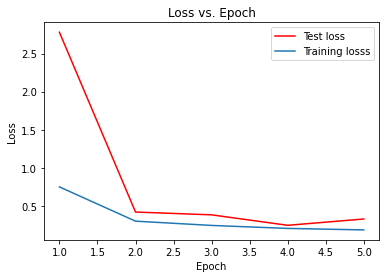

In [10]:
def plot_loss(history):
    '''Function to plot the loss vs. epoch'''
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'Test loss')
    plt.plot(x, train_loss, label = 'Training losss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    
plot_loss(history)

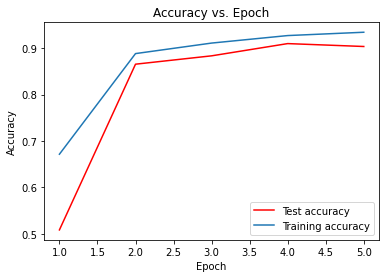

In [11]:
def plot_accuracy(history):
    train_acc = history.history['accuracy']
    test_acc = history.history['val_accuracy']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'Test accuracy')
    plt.plot(x, train_acc, label = 'Training accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    
plot_accuracy(history)

In [15]:
score, acc = nn.evaluate(testFeatures, testLabels,
                            batch_size=100)
print('Test score:', score)
print('Test accuracy:', acc)

8000/8000 [==============================] - 4s 544us/step
Test score: 0.3294347236864269
Test accuracy: 0.9036250114440918


In [ ]:
# Load features of data for predictions
inferStartNum = 20000
inferEndNum = 26999


inferenceImagesPath = 'data/inference/features'
allInferenceFeatures = loadImagesAsNpArray(inferenceImagesPath, inferStartNum, inferEndNum)
allInferenceFeatures = allInferenceFeatures.astype('float')/255

# Predictions
inferredLabels = nn.predict_classes(allInferenceFeatures)

In [ ]:
# Write results to a file
predicationsPath = 'data/inference'
with open(predicationsPath + '/predictions.csv','w') as outFile:
    outFile.write("filename,infected" + '\n')
    for imgIndex in range(inferredLabels.shape[0]):
        imgNumber = inferStartNum + imgIndex
        outFile.write(str(imgNumber) + '.jpg,' + str(inferredLabels[imgIndex]))
        if(imgIndex != inferredLabels.shape[0]-1):
            outFile.write('\n')